In [696]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.metrics import mean_squared_error

In [697]:
def squared_error(y_true, y_pred):
    return mean_squared_error(y_true, y_pred) * len(y_true)

In [698]:
# task 3

### Verify the generator and the fit function

In [699]:
def shape_generator(x: np.ndarray, order: int) -> np.ndarray:
    return 1 / np.power(x, order)


def generate_orders_of_x(x: np.ndarray, max_order: int, include_zero_order=True) -> np.ndarray:
    if max_order == 0:
        include_zero_order = True
    return np.array([shape_generator(x, order) for order in range(0 if include_zero_order else 1, max_order + 1)]).T


def fit_LR(x: np.ndarray, y: np.ndarray, max_order: int) -> sm.regression.linear_model:
    x_orders = generate_orders_of_x(x, max_order, include_zero_order=False)

    X = pd.DataFrame(x_orders, columns=[f'1/x^{i + 1}' for i in range(x_orders.shape[1])])
    X2 = sm.add_constant(X)
    reg = sm.OLS(y, X2).fit()

    return reg

In [700]:
def generate_dummy_data(order: int, size: int, add_normal_noise=True) -> (pd.DataFrame, np.ndarray):
    b = np.random.normal(0, 1, order + 1)
    x = np.arange(1, size + 1, 1)

    y = generate_orders_of_x(x, order, include_zero_order=True) @ b

    if add_normal_noise:
        noise = np.random.normal(0, abs(max(y) - min(y)) / 100, size)
        y += noise

    return pd.DataFrame({'x': x, 'y': y}), b

In [701]:
dummy_order = 3

In [702]:
dummy_no_noise, true_b = generate_dummy_data(dummy_order, 10, add_normal_noise=False)
reg = fit_LR(dummy_no_noise['x'], dummy_no_noise['y'], dummy_order)
np.array(reg.params.values), '\n', true_b

(array([ 0.57609518, -0.49648912, -1.42313182,  0.47169848]),
 '\n',
 array([ 0.57609518, -0.49648912, -1.42313182,  0.47169848]))

In [703]:
dummy_w_noise, true_b = generate_dummy_data(dummy_order, 10, add_normal_noise=True)
reg = fit_LR(dummy_w_noise['x'], dummy_w_noise['y'], dummy_order)
np.array(reg.params.values), '\n', true_b

(array([-0.29618527, -0.26425242,  0.58863131,  1.23850453]),
 '\n',
 array([-0.30856887, -0.19131251,  0.4434044 ,  1.31424132]))

### Fit the given data

In [704]:
x = np.arange(1, 9, 0.5)
y = [14, 18.222, 18, 17.216, 16.444, 15.778, 15.219, 14.749, 14.352, 14.014, 13.722, 13.469, 13.248, 13.052, 12.879,
     12.724]

In [705]:
df = pd.DataFrame({'x': x, 'y': y})
df

,x,y
0,1.0,14.000
1,1.5,18.222
2,2.0,18.000
3,2.5,17.216
4,3.0,16.444
5,3.5,15.778
6,4.0,15.219
7,4.5,14.749
8,5.0,14.352
9,5.5,14.014


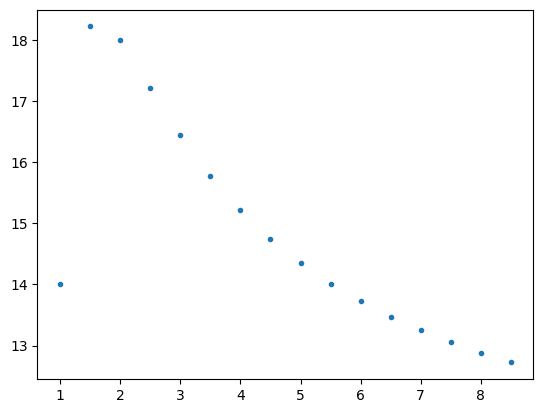

In [706]:
plt.plot(df['x'], df['y'], '.');

In [707]:
print('n', 'R^2   ', 'SSE')
for order in range(6):
    reg = fit_LR(df['x'], df['y'], order)
    x_orders = generate_orders_of_x(df['x'], order, include_zero_order=False)
    print(order,
          f"{reg.rsquared:.3f}", '',
          f"{squared_error(df['y'], reg.predict(sm.add_constant(x_orders))):.8f}")

n R^2    SSE
0 0.000  49.47570800
1 0.259  36.67310430
2 0.998  0.08739867
3 1.000  0.00000103
4 1.000  0.00000103
5 1.000  0.00000095


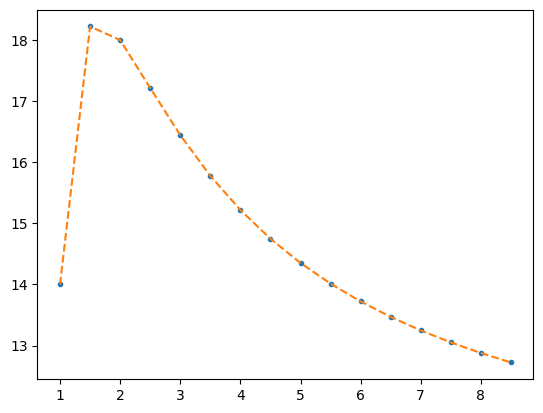

In [708]:
plt.plot(df['x'], df['y'], '.')
plt.plot(df['x'], reg.predict(sm.add_constant(x_orders)), '--');

In [709]:
model = fit_LR(df['x'], df['y'], 3)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.920e+08
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           2.40e-46
Time:                        19:49:31   Log-Likelihood:                 109.76
No. Observations:                  16   AIC:                            -211.5
Df Residuals:                      12   BIC:                            -208.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0001      0.000   2.03e+04      0.0

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
